Testing frames 500 to 1500 (n=100)


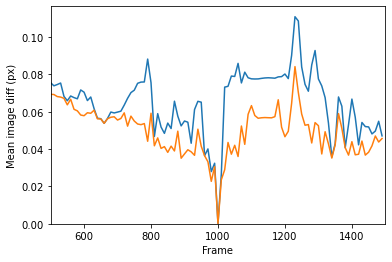

In [1]:
import matplotlib.pyplot as plt
import navbench

FRAME_DIST  = 500
IMSIZE    = (360, 110)
FRSKIP    = 10
FRAME     = 1000
RIDF_STEP = 1

db = navbench.Database('bottom_of_campus/straight_route1_fwd', size=IMSIZE, step=FRSKIP)
db.plot_idfs_frames(FRAME, FRAME_DIST, RIDF_STEP)
plt.show()